In [112]:
import random,datetime

In [334]:
size = 20

In [335]:
geneSet = [i for i in range(size)]

In [336]:
class Board:
    def __init__(self, genes, size):
        board = [[' . '] * size for _ in range(size)]
        for index in range(0, len(genes), 2):
            row = genes[index]
            column = genes[index + 1]
            board[column][row] = ' Q '
        self._board = board

    def get(self, row, column):
        return self._board[column][row]

    def print(self):
        for i in reversed(range(len(self._board))):
            print(' '.join(self._board[i]))

In [337]:
x = [0,0,0,1,0,2,0,3,0,4,0,5,0,6,0,7]
print(x)
Board(x,8).print()

[0, 0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6, 0, 7]
 Q   .   .   .   .   .   .   . 
 Q   .   .   .   .   .   .   . 
 Q   .   .   .   .   .   .   . 
 Q   .   .   .   .   .   .   . 
 Q   .   .   .   .   .   .   . 
 Q   .   .   .   .   .   .   . 
 Q   .   .   .   .   .   .   . 
 Q   .   .   .   .   .   .   . 


In [338]:
x = [0,0,1,0,2,0,3,0,4,0,5,0,6,0,7,0]
print(x)
Board(x,8).print()

[0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6, 0, 7, 0]
 .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   . 
 Q   Q   Q   Q   Q   Q   Q   Q 


In [339]:
def display(candidate, startTime, size):
    timeDiff = datetime.datetime.now() - startTime
    board = Board(candidate.Genes, size)
    board.print()
    print("{0}\t- {1}\t{2}".format(
        ' '.join(map(str, candidate.Genes)),
        candidate.Fitness,
        str(timeDiff)))

In [340]:
class Chromosome:
    def __init__(self, genes, fitness):
        self.Genes = genes
        self.Fitness = fitness
        
def mutate(parent):
    childGenes = parent.Genes[:]
    index = random.randrange(0, len(parent.Genes))
    newGene, alternate = random.sample(geneSet, 2)
    childGenes[index] = alternate if newGene == childGenes[index] else newGene
    fitness = get_fitness(childGenes,size)
    return Chromosome(childGenes, fitness)

In [341]:
def get_fitness(genes, size):
    board = Board(genes, size)
    rowsWithQueens = set()
    colsWithQueens = set()
    northEastDiagonalsWithQueens = set()
    southEastDiagonalsWithQueens = set()
    for row in range(size):
        for col in range(size):
            if board.get(row, col) == ' Q ':
                rowsWithQueens.add(row)
                colsWithQueens.add(col)
                northEastDiagonalsWithQueens.add(row + col)
                southEastDiagonalsWithQueens.add(size - 1 - row + col)
    total = size - len(rowsWithQueens) \
            + size - len(colsWithQueens) \
            + size - len(northEastDiagonalsWithQueens) \
            + size - len(southEastDiagonalsWithQueens)
    return total

In [342]:
def get_best():
    random.seed()
    startTime = datetime.datetime.now()
    x = [random.randint(0,7) for i in range(size*2)]
    bestParent = Chromosome(x,get_fitness(x,size))
    if bestParent.Fitness <= 0:
        return bestParent
    num = 0
    while True:
        num +=1
        child = mutate(bestParent)
        if bestParent.Fitness < child.Fitness:
            pass
        else:
            display(child,startTime,size)
            bestParent = child
            if child.Fitness <=0:
                return (child,num)

In [343]:
b = get_best()

 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   Q   Q   .   Q   .   .  

 .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   . 
 .   .   .   Q   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   . 
 .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   . 
 .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   . 
 .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .  

 .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   . 
 .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   . 
 Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   . 
 .   .   .   .   Q   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .  

 .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   . 
 .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   . 
 .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   . 
 Q   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   . 
 .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .  

 .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   . 
 .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   . 
 .   .   .   .   .   .   .   Q   .   .   .   .   Q   .   .   .   .   .   .   . 
 .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   . 
 Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   Q   .   .   .   .   .  

 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   . 
 .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   . 
5 18 19 17 16 6 12 0 0 9 13 19 7 14 18 10 2 13 3 2 8 12 14 15 1 1 16 3 9 4 19 16 11 5 4 7 6 11 17 13	- 3	0:00:00.953448
 .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   . 
 .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q 


 .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   . 
 .   Q   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   . 
 .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   . 
 .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   . 
 .   .   .   .   Q   .   .   .   .   .  

 .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   . 
 .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   . 
 .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   Q   .   . 
 .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   Q   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   . 
 .   .   .   .   .   .   .   .   .   .   Q   .   .   .   .   .   .   .   .   . 
 .   .   .   .   Q   .   .   .   .   .  

In [344]:
b[1]

5204

In [307]:
n = []
for i in range(100):
    n.append(get_best()[1])

In [308]:
import matplotlib.pyplot as plt

(array([42., 32., 12.,  6.,  1.,  2.,  1.,  2.,  0.,  2.]),
 array([ 106. ,  762.6, 1419.2, 2075.8, 2732.4, 3389. , 4045.6, 4702.2,
        5358.8, 6015.4, 6672. ]),
 <a list of 10 Patch objects>)

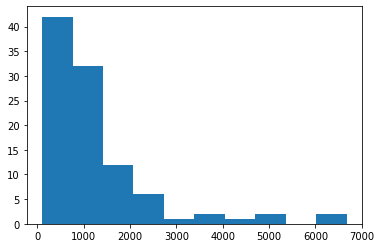

In [309]:
plt.hist(n)